# Effect of Covid on Housing Market in the U.S.
### STA 141B Final Project
Daniel Woo \
Sarah Shaik \
Henman Tan \
Junxi Chen \
Shanshan Chen

# Introduction

### In this project we are going to look at the trends in the housing market during COVID years 2020-present and analyze how COVID has affected the housing market all over the U.S. We analyze trends for big and small cities and also compare home purchase to rental choice. The data we use will be scraped and data frames will be created from that. Thereafter, we will conduct analysis on our data. 

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import urllib.request
import csv
import json
import pandas as pd
from pandas.tseries.offsets import MonthEnd

# Data Scraping

The data we will use will be from Zillow (https://www.zillow.com/research/data/). It contains information about the cities (column name: RegionName) and median home prices ranging from each month of 2018 to 2021. The columns are (2018-01-30, 2018-2-28 … 2021-9-30, 2021-10-31). 

Other columns include: 
Region Type (whether state or country)
RegionID (index of each entry) 
SizeRank (rank of the most populated city, ex NYC is ranked as #1 and LA as #2 and Gainsville, GA ranked at #229)
StateName (name of the state the city belongs to). 

In [11]:
def parse():
    r = requests.get('https://www.zillow.com/research/data/') #download the webpage
    soup = bs(r.text) #create beautiful soup object 
    divs = soup.find_all(
        'div', {'class': ['form-group', 'select-wrapper', 'data-dropdown-2']}) #find all dividers with class of form-group, select-wrapper,data-dropdown-2
    vls = []
    for d in divs: #iterate through dividers
        try:
            ln = d.find('option') #look for the options 
            print(ln['value']) 
            vls.append(ln['value']) #append the option from our dividers 
        except:
            break
    return vls

vls = parse()

ZHVI All Homes (SFR, Condo/Co-op) Time Series, Smoothed, Seasonally Adjusted($)
https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1639075266
ZHVF (Forecast), All Homes (SFR, Condo/Co-op), Smoothed, Seasonally Adjusted, Mid-Tier (YoY%)
https://files.zillowstatic.com/research/public_csvs/zhvf/zhvf_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1639075266
ZORI (Smoothed, Seasonally Adjusted): All Homes Plus Multifamily Time Series ($)
https://files.zillowstatic.com/research/public_csvs/zori/Metro_ZORI_AllHomesPlusMultifamily_SSA.csv?t=1639075266
For-Sale Inventory (Smooth, All Homes, Monthly)
https://files.zillowstatic.com/research/public_csvs/invt_fs/Metro_invt_fs_uc_sfrcondo_sm_month.csv?t=1639075266
Median List Price (Smooth, All Homes, Monthly)
https://files.zillowstatic.com/research/public_csvs/mlp/Metro_mlp_uc_sfrcondo_sm_month.csv?t=1639075266
Sales Count Nowcast (Raw, All Homes)
https://files.zillowstatic.com/research/pu

The following function gives us the Zillow Home Value Index (ZHVI) values over time. ZHVI reflects the typical value for homes in the 35th to 65th percentile range. The data is pulled from this CSV: 
https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1637624134

In [9]:
def zhvi():
    url = vls[1]
    df = pd.read_csv(url)
    count = len(df.columns)
    return df

zhvi().head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,127202.0,127546.0,127908.0,128645.0,129389.0,...,271623.0,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,394913,1,"New York, NY",Msa,NY,224341.0,225681.0,226887.0,229261.0,231472.0,...,516687.0,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231193.0,231998.0,233231.0,235576.0,238089.0,...,741209.0,748698.0,756569.0,767615.0,783282.0,803090.0,823992.0,837437.0,846549.0,851308.0
3,394463,3,"Chicago, IL",Msa,IL,170104.0,170505.0,171024.0,172064.0,173166.0,...,258211.0,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130035.0,130139.0,130225.0,130437.0,130658.0,...,276637.0,280005.0,284015.0,289524.0,295921.0,303225.0,311010.0,318887.0,326057.0,332118.0


The following function gives us the Zillow Observed Rent Index (ZORI) values over time which is computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region. The data is pulled from this CSV: https://files.zillowstatic.com/research/public_csvs/zori/Metro_ZORI_AllHomesPlusMultifamily_SSA.csv?t=1637624134

In [8]:
def zori():
    zori = vls[5]
    zoridf = pd.read_csv(zori)
    return zoridf

zori().head()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
0,102001,United States,0,1347.0,1352,1358.0,1364,1369,1375,1380,...,1727,1744,1761,1777,1795.0,1813,1830,1849,1867.0,1886.0
1,394913,"New York, NY",1,2356.0,2366,2376.0,2387,2397,2408,2418,...,2592,2608,2624,2640,2658.0,2676,2694,2715,2736.0,2757.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1719.0,1730,1740.0,1750,1761,1771,1782,...,2347,2366,2384,2402,2421.0,2440,2459,2480,2500.0,2521.0
3,394463,"Chicago, IL",3,1374.0,1378,1381.0,1385,1388,1392,1395,...,1583,1591,1599,1607,1615.0,1624,1633,1642,1652.0,1661.0
4,394514,"Dallas-Fort Worth, TX",4,1125.0,1129,1132.0,1136,1139,1143,1147,...,1480,1498,1516,1534,1552.0,1571,1589,1608,1628.0,1647.0


The following function gives us the median list price over time. The data is pulled from this CSV:
https://files.zillowstatic.com/research/public_csvs/mlp/Metro_mlp_uc_sfrcondo_sm_month.csv?t=1637624134

In [7]:
def median():
    median = vls[9]
    mediandf = pd.read_csv(median)
    return mediandf

median().head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,271600.0,272967.0,279333.0,288667.0,295633.0,...,333533.0,333850.0,340362.0,353728.0,367045.0,378267.0,381567.0,379933.0,376633.0,375000.0
1,394913,1,"New York, NY",Msa,NY,517967.0,523000.0,534333.0,544667.0,554666.0,...,661666.0,668000.0,673000.0,675000.0,675000.0,666667.0,658000.0,643200.0,636533.0,631867.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,798333.0,802667.0,818000.0,835000.0,848300.0,...,996997.0,998698.0,1005698.0,1006364.0,1006666.0,999666.0,991333.0,971333.0,946667.0,931633.0
3,394463,3,"Chicago, IL",Msa,IL,301000.0,305967.0,319300.0,335967.0,345967.0,...,331333.0,331667.0,338300.0,346633.0,352967.0,354667.0,354633.0,348267.0,339933.0,332967.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,341996.0,345330.0,351663.0,359830.0,366163.0,...,350726.0,352141.0,357025.0,365358.0,374884.0,383333.0,390167.0,393500.0,396500.0,397667.0


The following function gives us the Zillow Home Value Forecast (ZHVF) which is the one-year forecast of the Zillow Home Values Index (ZHVI). The data is pulled from this CSV: https://files.zillowstatic.com/research/public_csvs/zhvf/zhvf_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1639009565

In [4]:
def zhvf():
    url = vls[3]
    df = pd.read_csv(url)
    count = len(df.columns)
    return df

zhvf().head()

,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
0,Country,United States,NaN,NaN,NaN,2022-10-31,13.6
1,Msa,"Aberdeen, SD",SD,NaN,NaN,2022-10-31,8.0
2,Msa,"Aberdeen, WA",WA,NaN,NaN,2022-10-31,20.1
3,Msa,"Abilene, TX",TX,NaN,NaN,2022-10-31,11.6
4,Msa,"Ada, OK",OK,NaN,NaN,2022-10-31,12.3


The following function gives us for sale inventory which is the count of unique listings that were active at any time in a given month. The data is pulled from this CSV: https://files.zillowstatic.com/research/public_csvs/invt_fs/Metro_invt_fs_uc_sfrcondo_sm_month.csv?t=1639011550

In [6]:
def fsi():
    url = vls[7]
    df = pd.read_csv(url)
    count = len(df.columns)
    return df

fsi().head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,1427909.0,1385346.0,1442557.0,1529778.0,1631645.0,...,1053828.0,974066.0,962689.0,944961.0,980620.0,1010612.0,1055726.0,1100059.0,1116567.0,1103788.0
1,394913,1,"New York, NY",Msa,NY,68934.0,68508.0,73030.0,79963.0,85976.0,...,63693.0,59401.0,58657.0,59266.0,61377.0,63796.0,65300.0,65536.0,63953.0,62220.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,20081.0,19915.0,21870.0,23791.0,25757.0,...,20646.0,19414.0,19913.0,20251.0,20694.0,20787.0,21361.0,21805.0,21637.0,20776.0
3,394463,3,"Chicago, IL",Msa,IL,42815.0,41139.0,44766.0,49325.0,53872.0,...,36968.0,33295.0,32883.0,33204.0,35630.0,37719.0,39713.0,41154.0,41284.0,40272.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,24283.0,23206.0,24346.0,26749.0,29536.0,...,23662.0,21461.0,21041.0,20784.0,21797.0,22541.0,23736.0,24760.0,24994.0,24094.0


# Data Analysis

### Exploratory Analysis ###

When first exploring our data we first thought about grouping our rows by the states and starting our analysis from there. However it is important to note that metro areas in states differ very differently. For example, we see that with our entire data for ZHVI that states like Georgia, Ohio, Michigan, and North Carolina appeared very often. However, when looking at the states in the top 150 of size ranks we see that states such as California and Florida appear more often. This leads us to believe some states have their metro areas more spread out while others are more dense.

<AxesSubplot:title={'center':'Metro Areas by State'}, xlabel='StateName'>

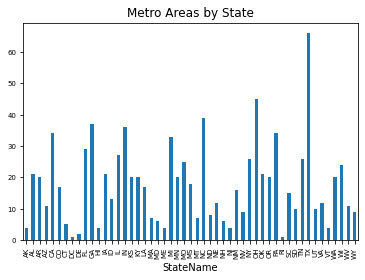

In [21]:
zhvi_df = zhvi()

zhvi_count = zhvi_df.groupby(['StateName']).count()
zhvi_count.iloc[:,1].plot(kind = 'bar',fontsize = 7,title = 'Metro Areas by State')

<AxesSubplot:title={'center':'Metro Areas in Top 150 by State'}, xlabel='StateName'>

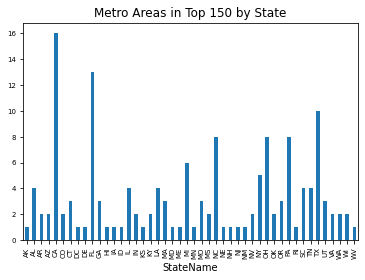

In [19]:
zhvi_df = zhvi()

top_df = zhvi_df.loc[zhvi_df['SizeRank'] <= 150]
top_count_df = top_df.groupby(['StateName']).count()
top_count_df.iloc[:,1].plot(kind = 'bar',fontsize = 7,title = 'Metro Areas in Top 150 by State')


### Compare big cities and small cities across United States and their home value index trend over the years. Compare changes in prices before 2020 and post 2020

#### We choose four cities, two big cities (most populated) from each of the coasts such as New York City, NY and Los Angeles, CA and two small cities from central America (least populated) such as Ann Harbor, MI and Lincoln, NE

For New York City, from the graph below we see that in New York, the prices for the homes fell between 2008-2011. This might have been due to the 2008 recession. Starting from 2018, we see a stark increaase in the home prices. Through covid years, i.e. 2020-present, we see that the home prices have gone up. 

<AxesSubplot:title={'center':'NYC, NY ZHVI Over Time'}>

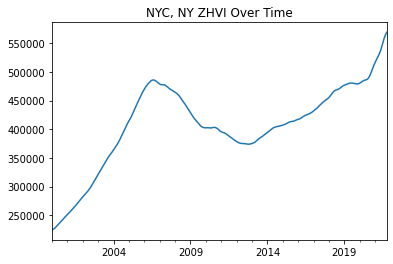

In [8]:
zhvi_df = zhvi()
nyc_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 394913]

nyc_zhvi_df.columns = pd.to_datetime(nyc_zhvi_df.columns)
nyc_zhvi_df.T.plot(legend = False, title = 'NYC, NY ZHVI Over Time')

For New York city, the sale inventory plot shows cyclic ups and downs between 2018 to 2021. The trend after 2020 to present shows obvious decreases, which is correponding to the home price increase during the COVID 19 pandemic period. Since the sale inventory decreases, the sale price increase.

<AxesSubplot:title={'center':'NYC, NY FSI Over Time'}>

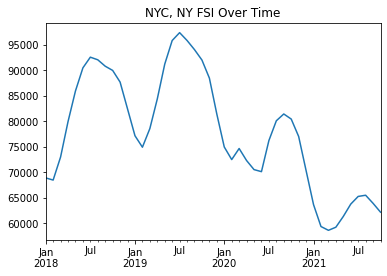

In [9]:
fsi_df = fsi()
nyc_fsi_df = fsi_df.iloc[:,5:][fsi_df.RegionID == 394913]
nyc_fsi_df.columns = pd.to_datetime(nyc_fsi_df.columns)
nyc_fsi_df.T.plot(legend = False, title = 'NYC, NY FSI Over Time')

For Los Angeles city, from the graph below we see that the prices for the homes fell between 2008-2011. Similar to the graph we see for NYC, this might have been due to the 2008 recession. However starting from 2014, we see a rapid increase in the home prices and through covid years, i.e. 2020-present, we see that the home prices have continously gone up. 

<AxesSubplot:title={'center':'Los Angeles, CA ZHVI Over Time'}>

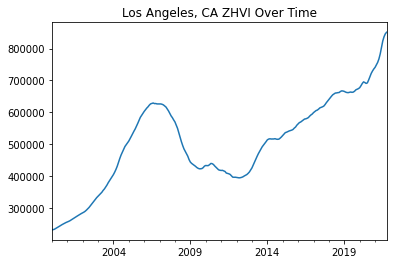

In [10]:
zhvi_df = zhvi()
la_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 753899]

la_zhvi_df.columns = pd.to_datetime(la_zhvi_df.columns)
la_zhvi_df.T.plot(legend = False, title = 'Los Angeles, CA ZHVI Over Time')

For Los Angeles, the sale inventory plot shows the similar trend as it of New York city. The sale inventory shows cyclic ups and downs between 2018 to present. There is obvious decrease in the main trend after 2020, which resulted from the COVID 19 pandemic. Also it matches with the trend of sale home price. Since the sale inventory decreases, the sale price increases.

<AxesSubplot:title={'center':'Los Angeles, CA FSI Over Time'}>

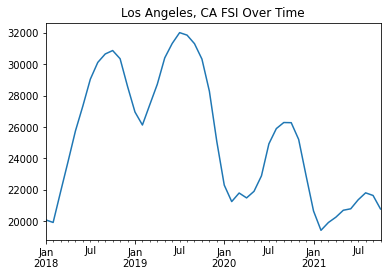

In [11]:
la_fsi_df = fsi_df.iloc[:,5:][fsi_df.RegionID == 753899]
la_fsi_df.columns = pd.to_datetime(la_fsi_df.columns)
la_fsi_df.T.plot(legend = False, title = 'Los Angeles, CA FSI Over Time')

In Ann Arbor, MI, from the graph below we see that the prices for the homes again fell between 2008-2012 due to the recession. Starting from 2012, the prices went up much more steeper than those we see in NYC and LA. 

<AxesSubplot:title={'center':'Ann Arbor, MI ZHVI Over Time'}>

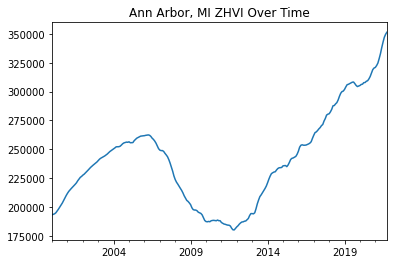

In [12]:
zhvi_df = zhvi()
aa_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 394332]

aa_zhvi_df.columns = pd.to_datetime(aa_zhvi_df.columns)
aa_zhvi_df.T.plot(legend = False, title = 'Ann Arbor, MI ZHVI Over Time')

For Ann Arbor, MI, the sale inventory plot shows cyclic ups and downs between 2018 to present. It is different from the main trend of New York or Los Angeles. Before 2020, the main trend increases cyclically with season. However, after 2020, there is obvious decrease duiring Covid 19 pandemic period. The increase is obvious if the increase trend before COVID 19 is considered.

<AxesSubplot:title={'center':'Ann Arbor, MI FSI Over Time'}>

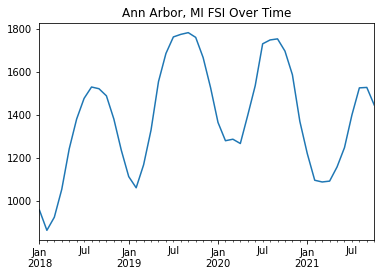

In [13]:
aa_fsi_df = fsi_df.iloc[:,5:][fsi_df.RegionID == 394332]
aa_fsi_df.columns = pd.to_datetime(aa_fsi_df.columns)
aa_fsi_df.T.plot(legend = False, title = 'Ann Arbor, MI FSI Over Time')

In Lincoln,NE, from the graph below we see a slight drop in the home prices between 2008-2019 due to the recession. However the drop in the prices were not as bad as we see for NYC, LA and Ann Arbor. Starting from 2016, the prices went up much more steeper than the drop that happened during the recession. During COVID years especially the prices of the homes have gone up and there is a steep increase in the prices. 

<AxesSubplot:title={'center':'Lincoln, NE ZHVI Over Time'}>

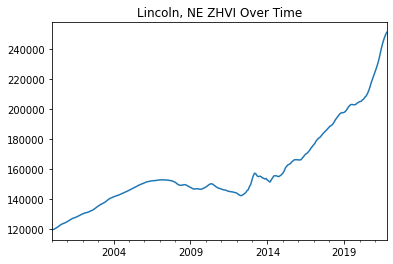

In [14]:
zhvi_df = zhvi()
lin_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 394796]

lin_zhvi_df.columns = pd.to_datetime(lin_zhvi_df.columns)
lin_zhvi_df.T.plot(legend = False, title = 'Lincoln, NE ZHVI Over Time')

In Lincoln,NE, the sale inventory plot shows the similar trend as it of New York City, Los Angeles. The sale inventory shows cyclic ups and downs between 2018 to present. There is obvious decrease in the main trend after 2020, which resulted from the COVID 19 pandemic. Also it is consistent with the trend of sale home price which increase after the COVID 19.

<AxesSubplot:title={'center':'Lincoln, NE FSI Over Time'}>

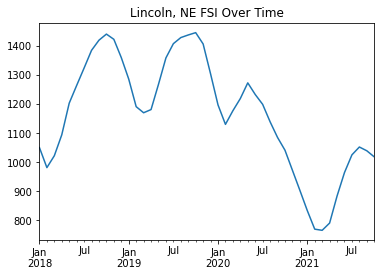

In [15]:
lin_fsi_df = fsi_df.iloc[:,5:][fsi_df.RegionID == 394796]
lin_fsi_df.columns = pd.to_datetime(lin_fsi_df.columns)
lin_fsi_df.T.plot(legend = False, title = 'Lincoln, NE FSI Over Time')

<AxesSubplot:title={'center':'USA ZHVI Over Time'}>

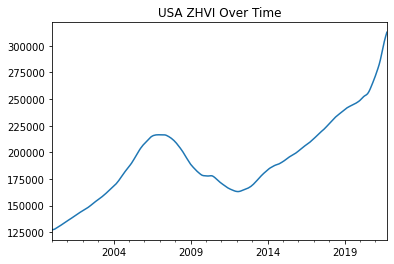

In [16]:
zhvi_df = zhvi()
us_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 102001]

us_zhvi_df.columns = pd.to_datetime(us_zhvi_df.columns)
us_zhvi_df.T.plot(legend = False, title = 'USA ZHVI Over Time')

<AxesSubplot:title={'center':'USA FSI Over Time'}>

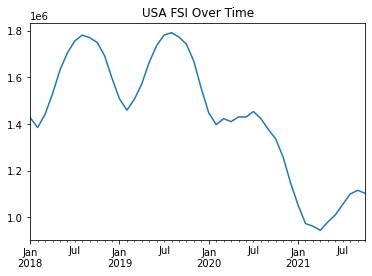

In [17]:
us_fsi_df = fsi_df.iloc[:,5:][fsi_df.RegionID == 102001]
us_fsi_df.columns = pd.to_datetime(us_fsi_df.columns)
us_fsi_df.T.plot(legend = False, title = 'USA FSI Over Time')

After looking at the graphs above and visualizing the complete trend for the U.S. itself we conlcude that overall, the last most prominent trend in the housing market was during the 2008 recession where all the home prices fell. However during covid years, i.e. from 2020-present, the home prices saw a steep incrase all over. The sale inventory shows periodic up and downs. During the COVID 19 years, all the cites have an descreasing trend on the sales inventory, which is consistent with the price increasing trend. It is worth noting that even the smaller cities saw an increase in the home prices, which means that the demand for homes increased during COVID time as more people got displaced from their jobs in bigger cities or just chose to change their lifestyles.

### Visualize home value index over COVID years for all states

The list of plots below for all the states in the U.S. show us how the home value has increased from 2020 to present. We see for the less popular states that the change over the given time has been constant. However for the more popular states we see a positive increase. 

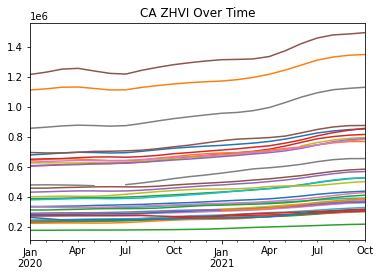

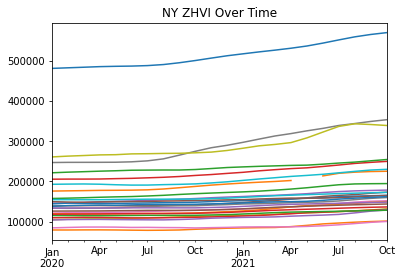

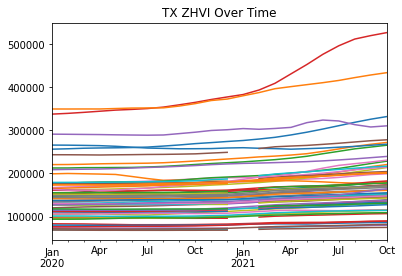

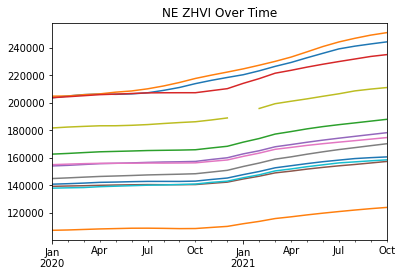

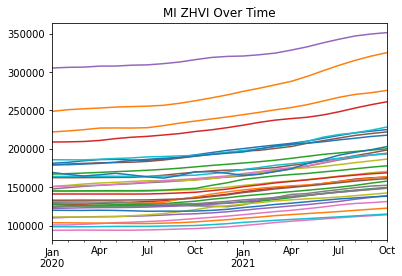

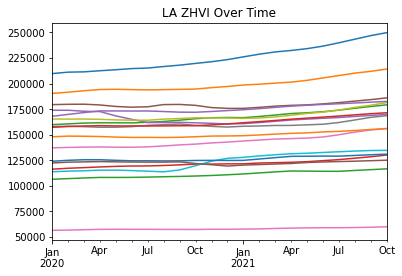

In [14]:
zhvi_df = zhvi()
states = ['CA', 'NY', 'TX', 'NE', 'MI', 'LA']
    
for i in states:
    st_zhvi_df = zhvi_df.loc[:,'2020-01-31':][zhvi_df.StateName == i]
    st_zhvi_df.columns = pd.to_datetime(st_zhvi_df.columns)
    st_zhvi_df.T.plot(legend = False, title = i+' ZHVI Over Time')

Another aspect we notice from the graphs above is that a lot of the homes in more populated states that have lower value index such as from `$100,000` or `$200,000` do not see that much of an increase in them. However homes that are much higher such as between `$300,000` to `$500,00` or even `$1 million` and above in states like CA, we see a more consistent increase. On the other hand, we see a smilar trend for less populated states but with smaller home value index such as in LA we see index range between `$50,000` to only `$100,000`. However the trend is still the same where the cheaper homes don't increase much but the expensive homes increase a lot more. This could be because the more expensive homes might be in areas that are more populated or in demand. Or just because they are huge homes with a lot of land value. 

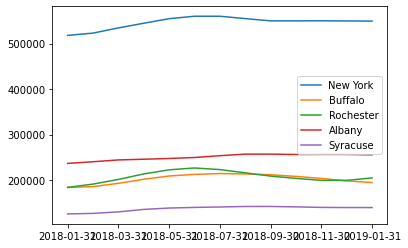

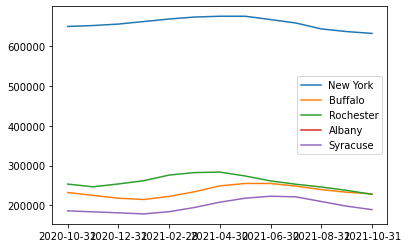

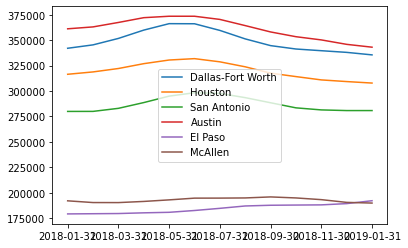

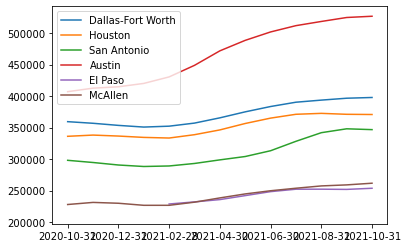

In [7]:
datamedian =median()
A= datamedian.loc[datamedian['StateName'] == 'NY' ]
B= A.iloc[:,5:18]
B.index = ['New York', 'Buffalo', 'Rochester','Albany', 'Syracuse']
B.T.plot()
# those are all representing NY cities. the numbers in the graph are just the index for them. 1 represent New York, 47-Buffalo, 51-Rochester,60-Albany, 79-Syracuse 
# this represent the median value in NY from 2018-01-31 to 2019-01-31, before covid. seems like New York with high median value and teh rest of them are similar to each other. 
# after COVID: 
C= A.iloc[:,38:51]
C.index = ['New York', 'Buffalo', 'Rochester','Albany', 'Syracuse']
C.T.plot()
# as we can see here, before the covid, New York have close to 500000 for their median price, and after covid, it even increase into 600000, same as Rochester, it also increase a lot, from around 200000 to close to 300000. 
# and for the other cities, even though the price related with the region area, we still can see the variation cause by Covid. those cities prices all increased after the Covid. 
#if we think region area could affect the result, we can also see other region. 
A2= datamedian.loc[datamedian['StateName'] == 'TX' ]
B2= A2.iloc[:, 5:18]
#print(A2)
B2.index = ['Dallas-Fort Worth', 'Houston', 'San Antonio', 'Austin', 'El Paso', 'McAllen']
B2.T.plot()

C2 =A2.iloc[:,38:51]
C2.index= ['Dallas-Fort Worth', 'Houston', 'San Antonio', 'Austin', 'El Paso', 'McAllen']
C2.T.plot()
# for region TX, except for the Dallas-Fort Worth have a huge increase, other cities just increase a little bit. hence, we can say that the the effect that covid let price to be changed varies from cities to cities. we cannot conclude an precise conclusion that the price incrrease was caused by time or covid. 


Those are all representing NY cities. The numbers in the graph are just the index for them. 1 represent New York, 47-Buffalo, 51-Rochester,60-Albany, 79-Syracuse 

This represent the median value in NY from 2018-01-31 to 2019-01-31, before covid. It seems like New York with high median value and the rest of them are similar to each other. 

If we think region area could affect the result, we can also see other region.

For region TX, except for the Dallas-Fort Worth having a huge increase, other cities just increase a little bit. Hence, we can say that the effect that COVID let price change varies from cities to cities. We cannot conclude a precise conclusion that the price increase was caused by time or COVID. 



### When is it better to rent versus buy a home? How has that changed over the pandemic?

Next we'll be looking closer at the Zillow Observed Rent Index and using that to help us determine whether renting or buying a home is better. To do this we'll be calculating a type of price to rent ratio using ZORI and ZHVI. By dividing our ZHVI by our ZORI we can see when markets have better rents in proportion to home values with a high ratio and vice versa. 

For this analysis we decided to choose different cities rather than Ann Arbor, MI and Lincoln, NE. Our dataset was missing rent values for Ann Arbor and Lincoln plus we suspect that smaller cities like Lincoln and Ann Arbor would not have many renters and might not be good places to analyze rents. A quick search on Zillow confirms this which currently shows Lincoln with around 200 rental listings versus 700 sale listings while a large city like Los Angeles has 5000 rental listings versus 4000 sale listings. We decided on two larger cities around the middle of the US instead: New Orleans, LA and Milwaukee, WI. 

<AxesSubplot:title={'center':'NYC Price to Rent Ratio Over Time'}>

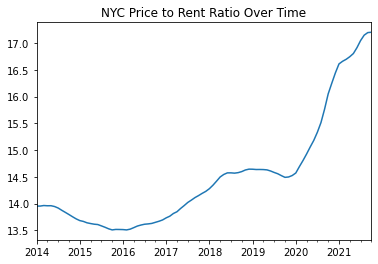

In [25]:
zori_df = zori()

nyc_zori_df = zori_df.iloc[:,3:][zori_df.RegionID == 394913]
nyc_zori_df.columns = pd.to_datetime(nyc_zori_df.columns) + MonthEnd(1)

nyc_price_to_rent_df = nyc_zhvi_df.loc[:,'2014-01-31':] / (nyc_zori_df * 12)
nyc_price_to_rent_df.columns = pd.to_datetime(nyc_price_to_rent_df.columns)
nyc_price_to_rent_df.T.plot(legend = False, title = 'NYC Price to Rent Ratio Over Time')

<AxesSubplot:title={'center':'LA Price to Rent Ratio Over Time'}>

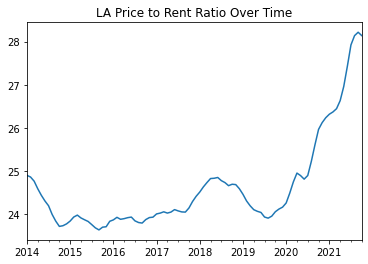

In [27]:
la_zori_df = zori_df.iloc[:,3:][zori_df.RegionID == 753899]
la_zori_df.columns = pd.to_datetime(la_zori_df.columns) + MonthEnd(1)

la_price_to_rent_df = la_zhvi_df.loc[:,'2014-01-31':] / (la_zori_df * 12)
la_price_to_rent_df.columns = pd.to_datetime(la_price_to_rent_df.columns)
la_price_to_rent_df.T.plot(legend = False, title = 'LA Price to Rent Ratio Over Time')

<AxesSubplot:title={'center':'New Orleans Price to Rent Ratio Over Time'}>

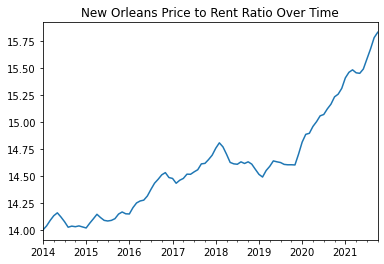

In [51]:
no_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 394910]
no_zori_df = zori_df.iloc[:,3:][zori_df.RegionID == 394910]
no_zori_df.columns = pd.to_datetime(no_zori_df.columns) + MonthEnd(1)

no_price_to_rent_df = no_zhvi_df.loc[:,'2014-01-31':] / (no_zori_df * 12)
no_price_to_rent_df.columns = pd.to_datetime(no_price_to_rent_df.columns)
no_price_to_rent_df.T.plot(legend = False, title = 'New Orleans Price to Rent Ratio Over Time')

<AxesSubplot:title={'center':'Milwaukee Price to Rent Ratio Over Time'}>

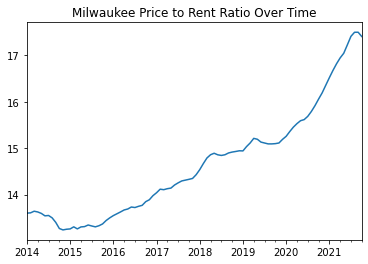

In [53]:
mil_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 394862]
mil_zori_df = zori_df.iloc[:,3:][zori_df.RegionID == 394862]
mil_zori_df.columns = pd.to_datetime(mil_zori_df.columns) + MonthEnd(1)

mil_price_to_rent_df = mil_zhvi_df.loc[:,'2014-01-31':] / (mil_zori_df * 12)
mil_price_to_rent_df.columns = pd.to_datetime(mil_price_to_rent_df.columns)
mil_price_to_rent_df.T.plot(legend = False, title = 'Milwaukee Price to Rent Ratio Over Time')

All of our data show a similar trend with the price to rent ratio increasing after the COVID pandemic. Los Angeles has a very high ratio throughout the entire time frame showing us that renting in LA has always been a good move financially. According to Investopedia, a price to rent ratio above 15 signals that it is better to rent over buy. Looking at NYC, Milwaukee, and New Orleans we see the sharp rise after COVID has pushed our ratio over 15 which makes buying a home not as financially feasible. 